# Customer Classification

We'll try to use KNN to create a model that directly predicts a class for a new customer based off of the features, which have been masked.
## Import Libraries


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [35]:
df = pd.read_csv("Classified Data",index_col=0)

**Check the head of the dataframe.**

In [36]:
df.head() 

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# EDA

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

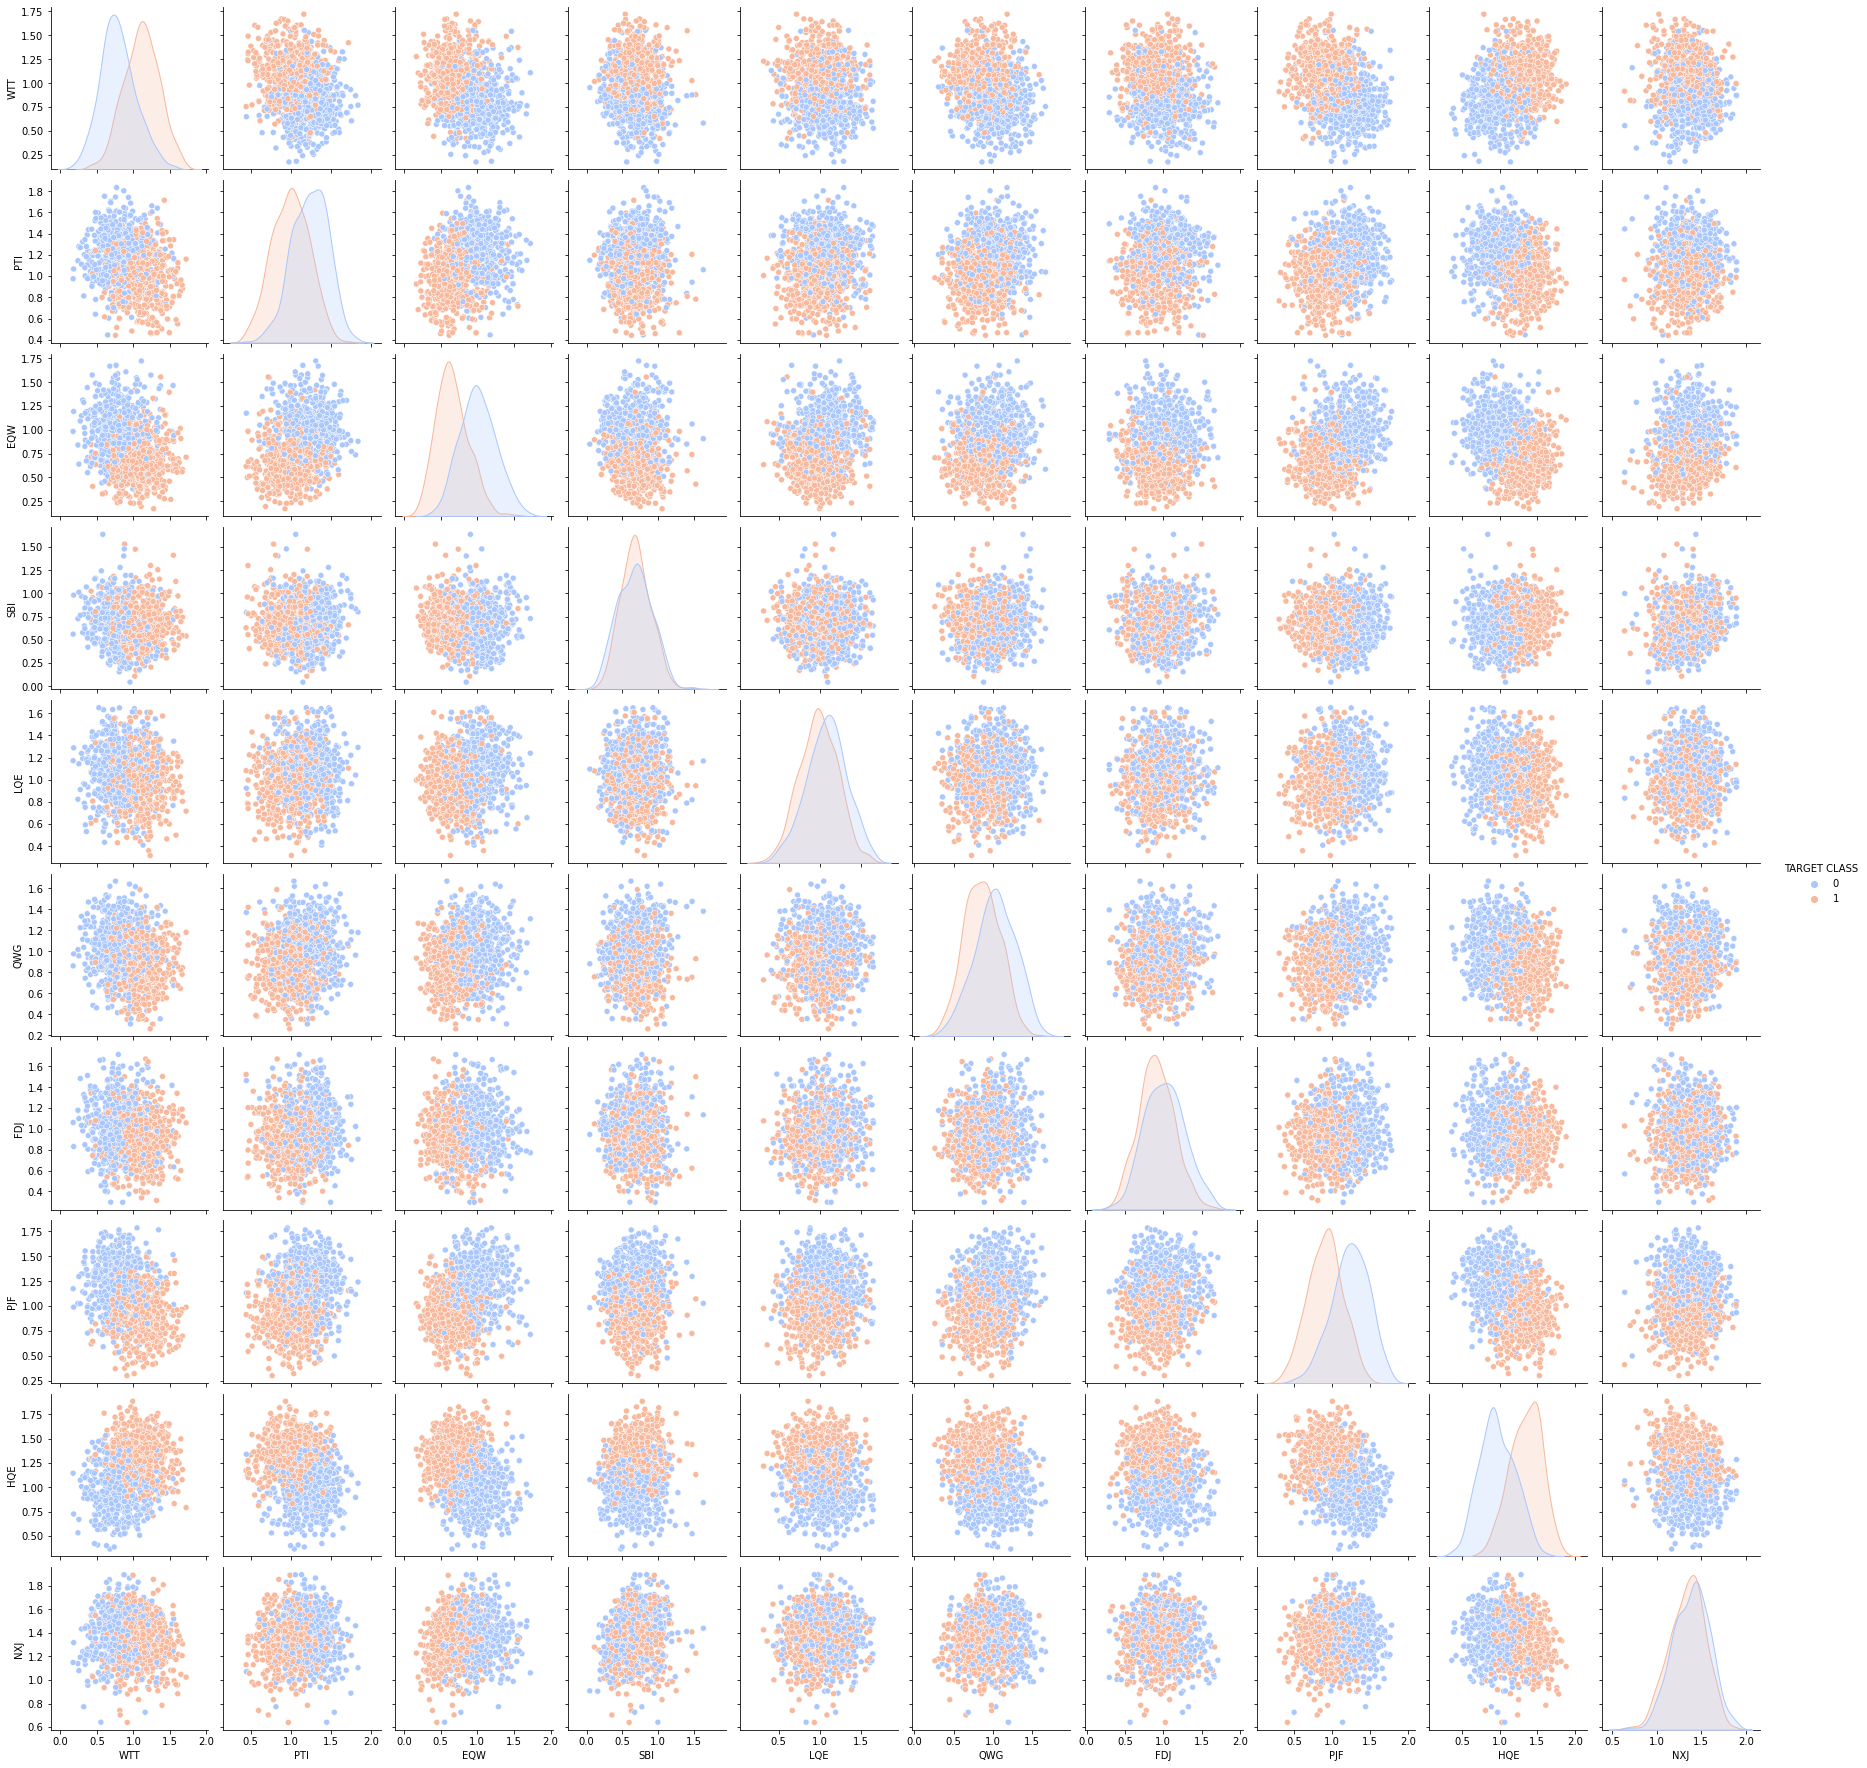

In [37]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables


In [38]:
from sklearn.preprocessing import StandardScaler

** Creating a StandardScaler() **

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [41]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [42]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

**Use train_test_split to split the data into a training set and a testing set.**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.2)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate the KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [48]:
pred = knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,pred))

[[101   8]
 [  7  84]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.91      0.92      0.92        91

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



In [52]:
# The solution is not as optimal; we can pick a better K for the classification

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

In [65]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [66]:
error_rate

[0.075,
 0.08,
 0.055,
 0.065,
 0.05,
 0.06,
 0.065,
 0.07,
 0.065,
 0.065,
 0.06,
 0.065,
 0.065,
 0.06,
 0.055,
 0.06,
 0.055,
 0.055,
 0.05]

Text(0, 0.5, 'Error Rate')

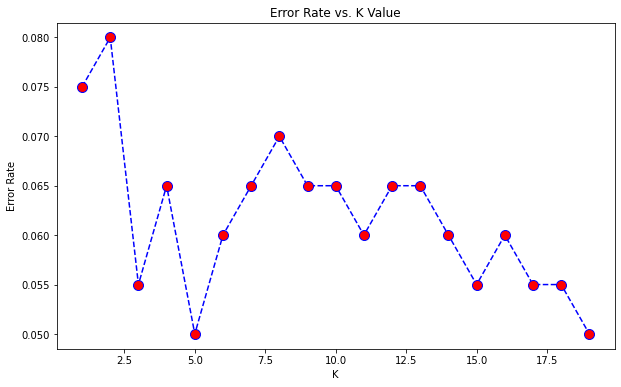

In [67]:
# Let's Plot these for better vizualization
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
# It looks like the best value of K for the lowest error rate is 5. Let's retrain the model

## Retrain with new K Value


In [69]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[102   7]
 [  3  88]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.93      0.97      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [71]:
# That's better. We have managed to get more accuracy predicting the test data set with number of neighbours equal 5